Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Вопрос: сколько в датасете пропущенных значений?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
transaction_data = pd.read_csv('transaction_data.csv')

In [3]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [4]:
transaction_data.isnull().sum()

date           0
name           0
transaction    0
dtype: int64

In [5]:
transaction_data.describe(include='all')

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений.

In [6]:
transaction_data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [10]:
trans_vs = transaction_data.transaction.value_counts()

In [11]:
trans_vs

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

[Text(0, 0, '3692'), Text(0, 0, '1619'), Text(0, 0, '4')]

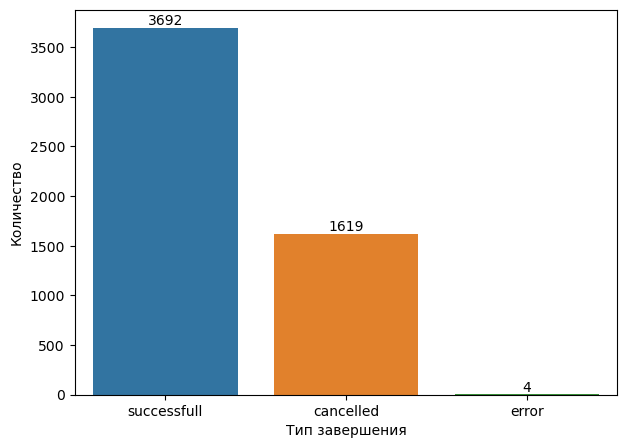

In [12]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=trans_vs.index, y=trans_vs.values, ax=ax)
ax.set_ylabel('Количество')
ax.set_xlabel('Тип завершения')
ax.bar_label(ax.containers[0])

Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

- по оси x – число транзакций

- по оси y – доля пользователей с таким числом транзакций

In [13]:
successfull_data = transaction_data.loc[transaction_data.transaction == 'successfull'].groupby('name', as_index=False).size()

In [14]:
successfull_data.head()

,name,size
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


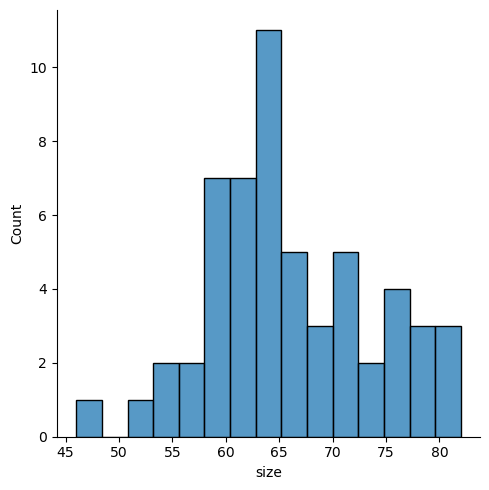

In [15]:
sns.displot(data=successfull_data, x='size',bins=15)

In [16]:
successfull_data.describe()

,size
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

- столбцы – имена пользователей

- строки – минута времени осуществления операции (minute)

- значения – число совершённых операций

Пропущенные значения заполните нулями.

In [21]:
df = pd.read_csv('transaction_data_updated.csv')

In [22]:
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [23]:
df.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [24]:
df = pd.read_csv('transaction_data_updated.csv', parse_dates=['date'])

In [25]:
per_minute = df.groupby(['name', 'minute'], as_index=False).size()

In [26]:
per_minute.head()

,name,minute,size
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [27]:
user_vs_minute_pivot = per_minute.pivot(index='minute', columns='name', values='size')

In [28]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [29]:
user_vs_minute_pivot = user_vs_minute_pivot.fillna(0)

In [30]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


Дополнительный проект

Откройте файлы из папки subset (tm_sales_1, tm_sales_2, ...) с продажами продуктов через телемаркетинг. Каждый файл содержит, как минимум, 4 колонки (поля): FILIAL_ID, SUBS_ID, PROD_ID, ACT_DTTM.

Суть задачи в том, чтобы проверить подключения продуктов определенным пользователям, соединив файлы о продажах с логами по подключениям в системе.

Особенности данных:

сотрудники телемаркетинга не всегда указывают полный id, если 'id' нет в начале SUBS_ID, то нужно его добавить
поля в файлах могут быть расположены абсолютно случайным образом, но названия полей статичны
продажа не засчитывается, если отключение (END_DTTM) произошло меньше чем через 5 минут после подключения (START_DTTM)
если в файле с продажами встречается строка без указанного SUBS_ID, она пропускается
Сохраните результат в csv файл.

Пример содержания итогового файла (колонка difference это разница между START_DTTM и END_DTTM):
    
ACT_DTTM;FILIAL_ID;difference
20-03-2020 14:59;1;255 days 09:01:00
            
Для проверки результатов введите SUBS_ID из полученного датасета в порядке возрастания, через запятую с пробелом. Например:
    
id1, id2

In [6]:
tm_sales_2 = pd.read_csv('tm_sales_2.csv')

In [7]:
tm_sales_2

,FILIAL_ID;SUBS_ID;PROD_ID;ACT_DTTM
0,3;id5416547;1743;17-03-2020 10:17
1,4;;7421;12-03-2020 11:25
2,7;8362218;9879;05-03-2020 11:42
3,2;2185490;3210;16-03-2020 16:28


In [8]:
tm_sales_1 = pd.read_csv('tm_sales_1.csv', sep=';')
tm_sales_2 = pd.read_csv('tm_sales_2.csv', sep=';')
tm_sales_3 = pd.read_csv('tm_sales_3.csv', sep=';')
prod_activations_logs = pd.read_csv('prod_activations_logs.csv', sep=';')

In [9]:
tm_sales_2.head()

,FILIAL_ID,SUBS_ID,PROD_ID,ACT_DTTM
0,3,id5416547,1743,17-03-2020 10:17
1,4,NaN,7421,12-03-2020 11:25
2,7,8362218,9879,05-03-2020 11:42
3,2,2185490,3210,16-03-2020 16:28


In [10]:
prod_activations_logs.head()

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM
1,id4651830,1954,20-03-2020 14:59,01-12-2020 00:00
5,id7646509,6431,19-03-2020 13:00,19-03-2020 13:03
2,id7461794,3310,20-03-2020 17:25,01-12-2020 00:00
3,id5416547,1743,17-03-2020 10:17,25-03-2020 11:00
4,id8238421,1859,01-03-2020 11:42,01-03-2020 11:43


In [11]:
tm_sales = pd.concat([tm_sales_1, tm_sales_2, tm_sales_3], ignore_index=True)

In [12]:
tm_sales.shape

(10, 4)

In [13]:
tm_sales = tm_sales.dropna(subset=['SUBS_ID'])

In [14]:
tm_sales.shape

(9, 4)

In [15]:
tm_sales

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
3,id5416547,3,1743,17-03-2020 10:17
5,8362218,7,9879,05-03-2020 11:42
6,2185490,2,3210,16-03-2020 16:28
7,id5764122,3,1499,18-03-2020 15:44
8,id7642700,6,3020,15-03-2020 14:21
9,id1374509,2,5677,17-03-2020 11:48


In [16]:
tm_sales.loc[~tm_sales.SUBS_ID.str.startswith('id')]

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
1,7646509,5,6431,19-03-2020 13:00
5,8362218,7,9879,05-03-2020 11:42
6,2185490,2,3210,16-03-2020 16:28


In [17]:
tm_sales.loc[~tm_sales.SUBS_ID.str.startswith('id'),
            'SUBS_ID'] = 'id' + tm_sales.loc[~tm_sales.SUBS_ID.str.startswith('id'), 'SUBS_ID']

In [18]:
tm_sales

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,id7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
3,id5416547,3,1743,17-03-2020 10:17
5,id8362218,7,9879,05-03-2020 11:42
6,id2185490,2,3210,16-03-2020 16:28
7,id5764122,3,1499,18-03-2020 15:44
8,id7642700,6,3020,15-03-2020 14:21
9,id1374509,2,5677,17-03-2020 11:48


In [19]:
sales_logs = prod_activations_logs.merge(tm_sales, on=['SUBS_ID', 'PROD_ID'])

In [20]:
sales_logs

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM,FILIAL_ID,ACT_DTTM
0,id4651830,1954,20-03-2020 14:59,01-12-2020 00:00,1,20-03-2020 14:59
1,id7646509,6431,19-03-2020 13:00,19-03-2020 13:03,5,19-03-2020 13:00
2,id5416547,1743,17-03-2020 10:17,25-03-2020 11:00,3,17-03-2020 10:17
3,id2185490,3210,16-03-2020 16:28,01-12-2020 00:00,2,16-03-2020 16:28
4,id7642700,3020,15-03-2020 14:21,15-03-2020 23:42,6,15-03-2020 14:21


In [21]:
sales_logs.dtypes

SUBS_ID       object
PROD_ID        int64
START_DTTM    object
END_DTTM      object
FILIAL_ID      int64
ACT_DTTM      object
dtype: object

In [22]:
pd.to_datetime(sales_logs.START_DTTM)

0   2020-03-20 14:59:00
1   2020-03-19 13:00:00
2   2020-03-17 10:17:00
3   2020-03-16 16:28:00
4   2020-03-15 14:21:00
Name: START_DTTM, dtype: datetime64[ns]

In [23]:
sales_logs.START_DTTM = pd.to_datetime(sales_logs.START_DTTM)

In [24]:
sales_logs.END_DTTM = pd.to_datetime(sales_logs.END_DTTM, format='%d-%m-%Y %H:%M')

In [25]:
sales_logs

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM,FILIAL_ID,ACT_DTTM
0,id4651830,1954,2020-03-20 14:59:00,2020-12-01 00:00:00,1,20-03-2020 14:59
1,id7646509,6431,2020-03-19 13:00:00,2020-03-19 13:03:00,5,19-03-2020 13:00
2,id5416547,1743,2020-03-17 10:17:00,2020-03-25 11:00:00,3,17-03-2020 10:17
3,id2185490,3210,2020-03-16 16:28:00,2020-12-01 00:00:00,2,16-03-2020 16:28
4,id7642700,3020,2020-03-15 14:21:00,2020-03-15 23:42:00,6,15-03-2020 14:21


In [26]:
sales_logs['difference'] = sales_logs.END_DTTM - sales_logs.START_DTTM

In [27]:
sales_logs

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM,FILIAL_ID,ACT_DTTM,difference
0,id4651830,1954,2020-03-20 14:59:00,2020-12-01 00:00:00,1,20-03-2020 14:59,255 days 09:01:00
1,id7646509,6431,2020-03-19 13:00:00,2020-03-19 13:03:00,5,19-03-2020 13:00,0 days 00:03:00
2,id5416547,1743,2020-03-17 10:17:00,2020-03-25 11:00:00,3,17-03-2020 10:17,8 days 00:43:00
3,id2185490,3210,2020-03-16 16:28:00,2020-12-01 00:00:00,2,16-03-2020 16:28,259 days 07:32:00
4,id7642700,3020,2020-03-15 14:21:00,2020-03-15 23:42:00,6,15-03-2020 14:21,0 days 09:21:00


In [28]:
result = sales_logs.loc[sales_logs.difference > pd.Timedelta(5, 'm')]

In [29]:
result

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM,FILIAL_ID,ACT_DTTM,difference
0,id4651830,1954,2020-03-20 14:59:00,2020-12-01 00:00:00,1,20-03-2020 14:59,255 days 09:01:00
2,id5416547,1743,2020-03-17 10:17:00,2020-03-25 11:00:00,3,17-03-2020 10:17,8 days 00:43:00
3,id2185490,3210,2020-03-16 16:28:00,2020-12-01 00:00:00,2,16-03-2020 16:28,259 days 07:32:00
4,id7642700,3020,2020-03-15 14:21:00,2020-03-15 23:42:00,6,15-03-2020 14:21,0 days 09:21:00


In [30]:
result.SUBS_ID.sort_values().values

array(['id2185490', 'id4651830', 'id5416547', 'id7642700'], dtype=object)

In [31]:
result.to_csv('result_csv')